In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [71]:
y_val = np.load("/home/notchla/Documents/dental_y_val.npy", allow_pickle=True)
x_val = np.load("/home/notchla/Documents/dental_x_val.npy", allow_pickle=True)
recon_perc = np.load("/home/notchla/Documents/dental_recon_poisson.npy", allow_pickle = True)
recon_edge = np.load("/home/notchla/Documents/edge_dental_recon_poisson.npy", allow_pickle=True)


In [72]:
'''x_val = tf.cast(x_val, "float32")
y_val = tf.cast(y_val, "float32")
recon_perc = tf.cast(recon_perc, "float32")
recon_edge = tf.cast(recon_edge, "float32")'''

'x_val = tf.cast(x_val, "float32")\ny_val = tf.cast(y_val, "float32")\nrecon_perc = tf.cast(recon_perc, "float32")\nrecon_edge = tf.cast(recon_edge, "float32")'

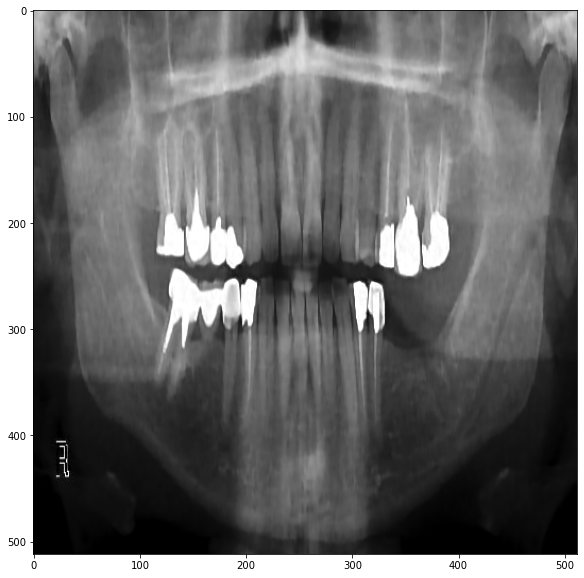

In [73]:
plt.figure(figsize=(10,10))
plt.imshow(recon_perc[10])
plt.savefig("/home/notchla/Documents/recon_dental_poisson.png", dpi=300, bbox_inches = "tight")
plt.gray()



In [74]:
a = tf.cast(y_val, "float32")
b = tf.cast(x_val, "float32")
c = tf.cast(recon_perc, "float32")

ssim = tf.image.ssim(a[22], b[22], max_val = 1.0)
print(ssim)
ssim = tf.image.ssim(a[22], c[22], max_val = 1.0)
print(ssim)

tf.Tensor(0.6692795, shape=(), dtype=float32)
tf.Tensor(0.9241256, shape=(), dtype=float32)


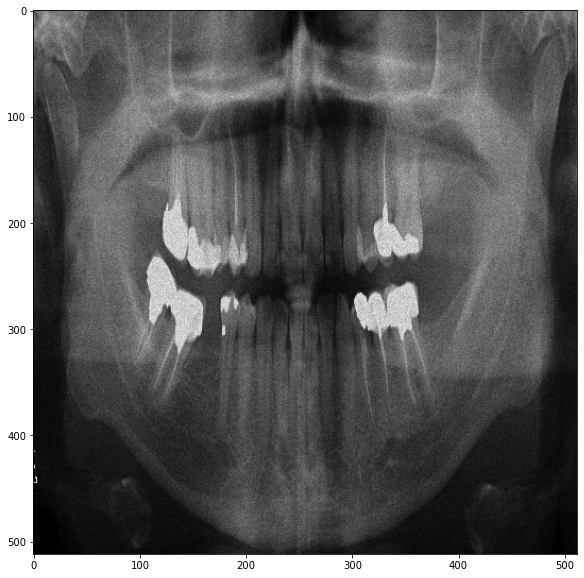

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(x_val[22])
plt.savefig("/home/notchla/Documents/original_dental.png", dpi=300, bbox_inches = "tight")
plt.gray()

In [76]:
#create patches
PATCHING_SIZE = 64
ksize_rows = PATCHING_SIZE
ksize_cols = PATCHING_SIZE
strides_rows = PATCHING_SIZE
strides_cols = PATCHING_SIZE
overlap = 8

ksizes = [1, ksize_rows, ksize_cols, 1]
strides = [1, strides_rows, strides_cols, 1]
rates = [1, 1, 1, 1]
padding = "VALID"
x_val_patches = tf.image.extract_patches(images = x_val, sizes = ksizes, strides = strides, rates=rates, padding=padding)
y_val_patches = tf.image.extract_patches(images = y_val, sizes = ksizes, strides = strides, rates=rates, padding=padding)
recon_perc_patches = tf.image.extract_patches(images = recon_perc, sizes = ksizes, strides = strides, rates=rates, padding=padding)
recon_edge_patches = tf.image.extract_patches(images = recon_edge, sizes = ksizes, strides = strides, rates=rates, padding=padding)

In [77]:
axis_0, axis_1, axis_2, _ = x_val_patches.shape
print(axis_0, axis_1, axis_2)
print(x_val_patches.shape)

23 8 8
(23, 8, 8, 4096)


In [78]:
x_val_patches.shape

TensorShape([23, 8, 8, 4096])

In [79]:
nsamples_train = axis_0 * axis_1 * axis_2
x_val_patches = np.reshape(x_val_patches, [nsamples_train, PATCHING_SIZE, PATCHING_SIZE, 1])
y_val_patches = np.reshape(y_val_patches, [nsamples_train, PATCHING_SIZE, PATCHING_SIZE, 1])
recon_perc_patches = np.reshape(recon_perc_patches, [nsamples_train, PATCHING_SIZE, PATCHING_SIZE, 1])
recon_edge_patches = np.reshape(recon_edge_patches, [nsamples_train, PATCHING_SIZE, PATCHING_SIZE, 1])

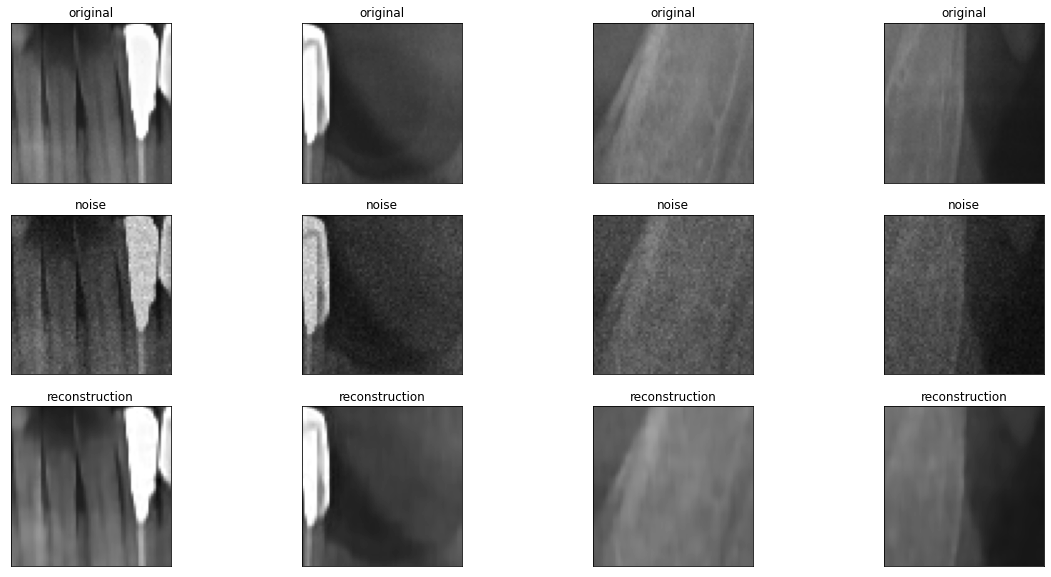

In [80]:
n = 4
image = 10
row = 4
fig = plt.figure(figsize=(20, 10))
for i in range(n):

    # display original + noise
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(y_val_patches[i + 64*image + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("noise")
    plt.imshow(x_val_patches[i + image*64 + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    #display original
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstruction")
    plt.imshow(recon_perc_patches[i + 64*image + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

plt.show()
fig.savefig("/home/notchla/Documents/patches_dental2.png", dpi= 300, bbox_inches="tight")

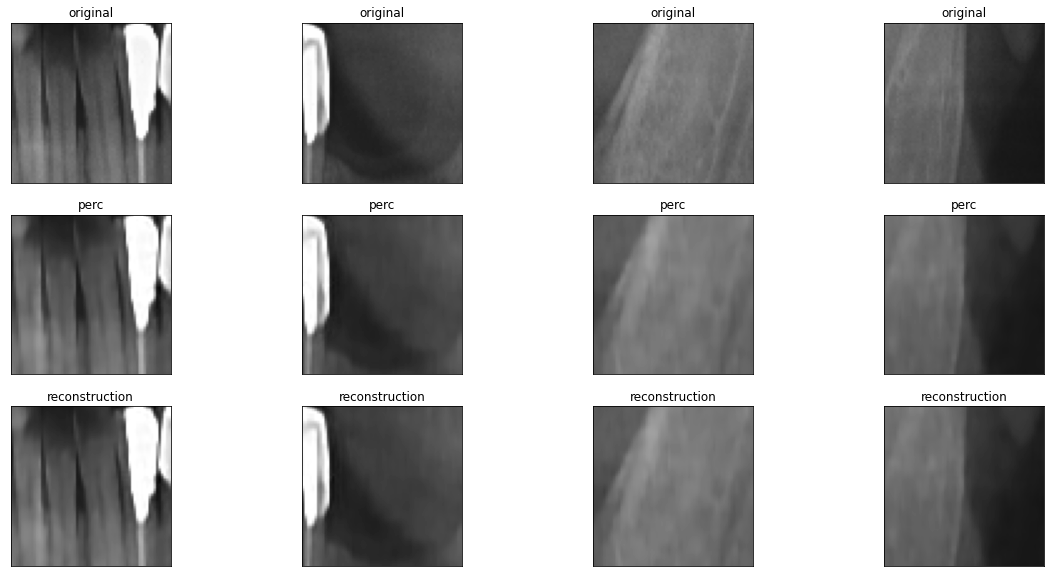

In [85]:
n = 4
image = 10
row = 4
fig = plt.figure(figsize=(20, 10))
for i in range(n):

    # display original + noise
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(y_val_patches[i + 64*image + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("edge + perc")
    plt.imshow(recon_perc_patches[i + image*64 + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    #display original
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("edge")
    plt.imshow(recon_edge_patches[i + 64*image + row*8 + 4], cmap="gray", vmin=0, vmax=1)
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

plt.show()

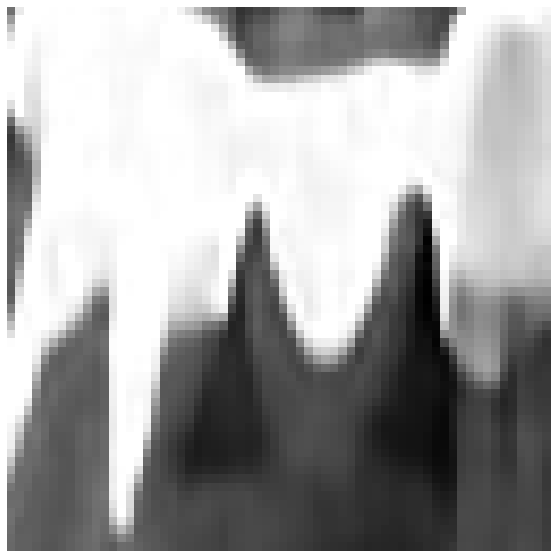

In [82]:
plt.figure(figsize=(10,10))
plt.imshow(recon_perc_patches[2+ 64*image + row*8])
plt.axis("off")
plt.savefig("/home/notchla/Documents/recon_perc_patch.png", dpi=300, bbox_inches = "tight")
plt.gray()

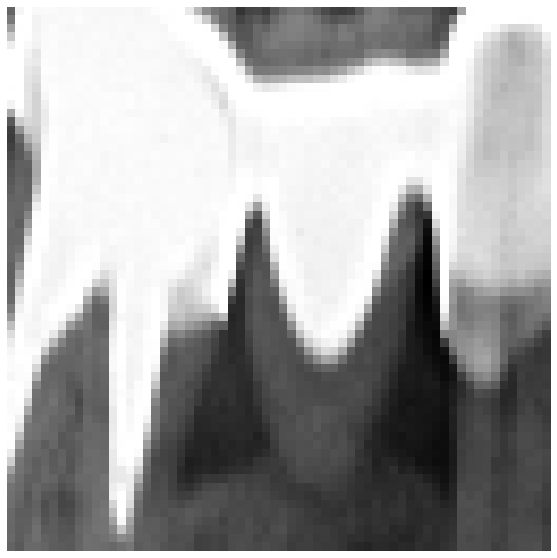

In [83]:
plt.figure(figsize=(10,10))
plt.imshow(y_val_patches[2+ 64*image + row*8])
plt.axis("off")
plt.savefig("/home/notchla/Documents/original_patch.png", dpi=300, bbox_inches = "tight")
plt.gray()